# Carcinoma and Gland Analysis

Camilo Alejandro Alaguna Córdoba

Maestría en Ingeniería - Ingeniería de Sistemas y Computación

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import math
import heapq
import random
import os
import glob

## 1. Loading data functions

In [2]:
folder = "data//carcinoma"

def getData(path):
    points = []
    with open(path) as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
        for x, y in spamreader:
            points.append((float(x), float(y)))
    return points

In [3]:
filename = "carcinoma002.csv"
path = folder + "//" + filename

centroids = getData(path)

## 2. Graphing data

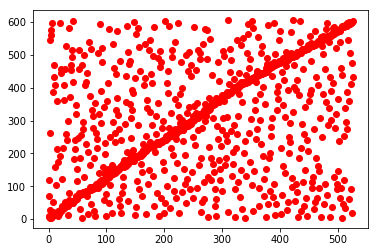

In [4]:
plt.plot(centroids, 'ro')
plt.show()

## 3. Graph creation

In [5]:
def createGraph(points, generateEdges):
    G = nx.Graph()
    nodes = designate(points)
    generateEdges(G, nodes)
    return G

def designate(points):
    nodes = {}
    index = 0
    for u in points:
        nodes[index] = u
        index = index + 1
    return nodes

def distance(u, v):
    x1, y1 = u
    x2, y2 = v
    return math.sqrt((x1 - x2) * (x1 - x2) + (y1 - y2) * (y1 - y2))

### 3.1. Functions for graph generation

#### 3.1.1. Minimum Spaning Tree

In [6]:
class PriorityQueue:
    def __init__(self):
        self._queue = []
        self._index = 0
        self._count = 0

    def push(self, item, priority):
        heapq.heappush(self._queue, (-priority, self._index, item))
        self._index += 1
        self._count += 1

    def pop(self):
        self._count -= 1
        return heapq.heappop(self._queue)[-1]
    
    def isEmpty(self):
        return self._count == 0

In [7]:
class DisjointSet:
    def __init__(self, n):
        self.sets = list(range(n))
    
    def find(self, x):
        if self.sets[x] == x:
            return x
        return self.find(self.sets[x])
    
    def merge(self, u, v):
        self.sets[self.find(u)] = self.find(v)
    
    def areJoined(self, u, v):
        return self.find(u) == self.find(v)

In [8]:
def mst(G, nodes):
    Q, S = init(nodes)
    while not Q.isEmpty():
        u, v = Q.pop()
        if not S.areJoined(u, v):
            S.merge(u, v)
            G.add_edge(u, v, weight=1)

def init(nodes):
    Q = getEdges(nodes)
    S = DisjointSet(len(nodes))
    return (Q, S)

def getEdges(nodes):
    Q = PriorityQueue()
    for u in nodes.keys():
        for v in nodes.keys():
            if u != v:
                Q.push((u, v), distance(nodes[u], nodes[v]))
    return Q

#### 3.1.2. Waxman graph

In [9]:
beta = 2
k = 0.05

def waxman(G, nodes):
    for u in nodes.keys():
        for v in nodes.keys():
            if u != v:
                rnd = random.uniform(0, 1)
                if rnd < probability(nodes[u], nodes[v]):
                    G.add_edge(u, v, weight=1)

def probability(u, v):
    dist = distance(u, v)
    return beta * math.exp(-dist * k)

### 3.2. Graph generation

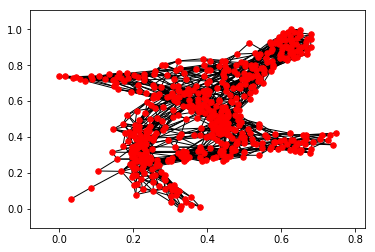

In [10]:
G = createGraph(centroids, waxman)

nx.draw_networkx(G, cmap=plt.get_cmap('jet'), node_size=30, with_labels=False)
plt.show()

## 4. Data Analysis

### 4.1. Analysis functions

#### 4.1.1. Max degree

In [11]:
def maxDegree(G):
    maxd = 0
    degree = {}
    for u in G.nodes():
        degree[u] = 0
    for u, v in G.edges():
        degree[u] = degree[u] + 1
        degree[v] = degree[v] + 1
        if degree[u] > maxd:
            maxd = degree[u]
        if degree[v] > maxd:
            maxd = degree[v]
    return maxd

In [12]:
print(maxDegree(G))

19


#### 4.1.2. Number of edges

In [13]:
def numberOfEdges(G):
    return len(G.edges())

In [14]:
print(numberOfEdges(G))

2493


#### 4.1.3. Clustering coefficient

In [15]:
coef = nx.average_clustering(G)
print(coef)

0.30547954397773186


#### 4.1.4. Average degree

In [16]:
def averageDegree(G):
    degree = {}
    for u in G.nodes():
        degree[u] = 0
    for u, v in G.edges():
        degree[u] = degree[u] + 1
        degree[v] = degree[v] + 1
    acc = 0
    for u in degree.keys():
        acc += degree[u]
    return acc / len(degree)

In [17]:
avgd = averageDegree(G)
print(avgd)

9.461100569259962


### 4.2. MST Data Analysis

In [18]:
folders = ["data//carcinoma//", "data//gland//"]

#### 4.2.1. Obtaining data

In [45]:
clustering = []
edges_number = []
max_degree = []
avg_degree = []

for folder in folders:
    cl, en, md, ad = [], [], [], []
    for filename in glob.glob(os.path.join(folder, '*.csv')):
        centroids = getData(filename)
        G = createGraph(centroids, mst)
        cl.append(nx.average_clustering(G))
        en.append(numberOfEdges(G))
        md.append(maxDegree(G))
        ad.append(averageDegree(G))
    clustering.append(cl)
    edges_number.append(en)
    max_degree.append(md)
    avg_degree.append(ad)

#### 4.2.2. Clustering Coefficient

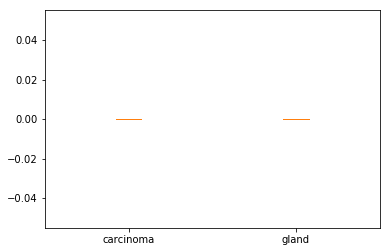

In [46]:
plt.boxplot(clustering)
plt.xticks([1, 2], ['carcinoma', 'gland'])
plt.show()

It is expected that the clustering coefficient is equals to 0 when the Minimum Spanning Tree is used to represent data, due to this kind of networks don't have cliques. This makes impossible to differenciate both kind of networks.

#### 4.2.3. Number of edges

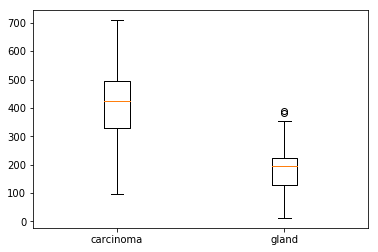

In [47]:
plt.boxplot(edges_number)
plt.xticks([1, 2], ['carcinoma', 'gland'])
plt.show()

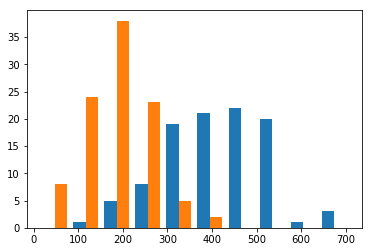

In [50]:
plt.hist(edges_number)
plt.show()

#### 4.2.4. Max degree

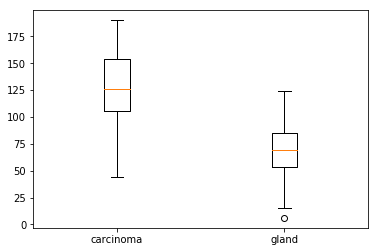

In [48]:
plt.boxplot(max_degree)
plt.xticks([1, 2], ['carcinoma', 'gland'])
plt.show()

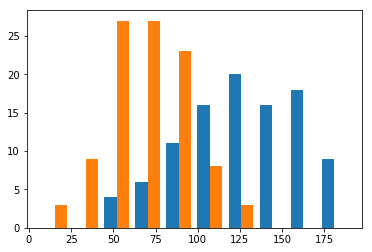

In [51]:
plt.hist(max_degree)
plt.show()

#### 4.2.5. Average degree

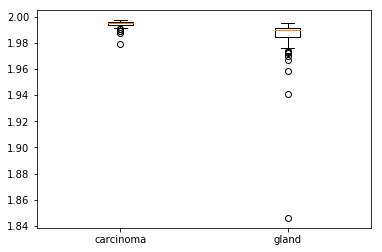

In [49]:
plt.boxplot(avg_degree)
plt.xticks([1, 2], ['carcinoma', 'gland'])
plt.show()

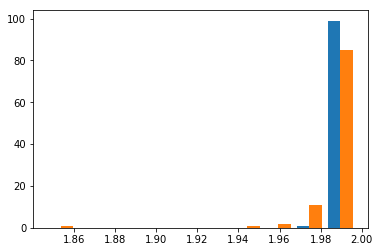

In [52]:
plt.hist(avg_degree)
plt.show()

### 4.3. Waxman Data Analysis

#### 4.3.1. Obtaining data

In [24]:
clustering = []
edges_number = []
max_degree = []
avg_degree = []

for folder in folders:
    cl, en, md, ad = [], [], [], []
    for filename in glob.glob(os.path.join(folder, '*.csv')):
        centroids = getData(filename)
        G = createGraph(centroids, waxman)
        cl.append(nx.average_clustering(G))
        en.append(numberOfEdges(G))
        md.append(maxDegree(G))
        ad.append(averageDegree(G))
    clustering.append(cl)
    edges_number.append(en)
    max_degree.append(md)
    avg_degree.append(ad)

#### 4.3.2. Clustering Coefficient

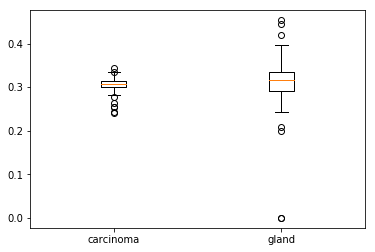

In [25]:
plt.boxplot(clustering)
plt.xticks([1, 2], ['carcinoma', 'gland'])
plt.show()

The carcinoma clustering coefficient box is so narrow, this shows that most of the nodes are equally clustered, that is to say, carcinoma networks lack of a hierarchy, and they might be more disordered that gland networks. In the other hand, the gland box shows that gland graphs might present hierarchical structures and might be more complex that carcinoma networks.

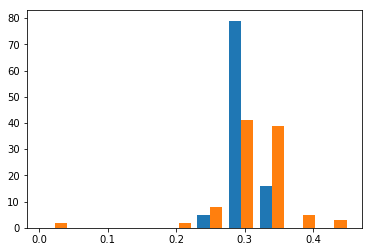

In [44]:
plt.hist(clustering)
plt.show()

Histogram Graph shows a similar behaviour explaned above, but both graphs has the most of data in the same points, then I can't conclude both graphs are significantly different.

#### 4.3.3. Number of edges

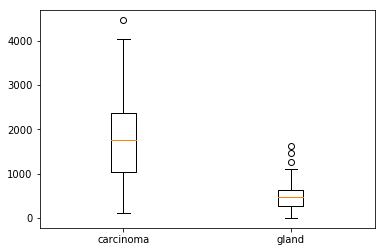

In [26]:
plt.boxplot(edges_number)
plt.xticks([1, 2], ['carcinoma', 'gland'])
plt.show()

It is clear that in average the carcinoma networks have aproximatelly three times the number of gland number of edges, thus it indicates that carcinoma networks are pretty much more connected than gland networks, that suggest carcinoma networks might be more caothic that gland networks.

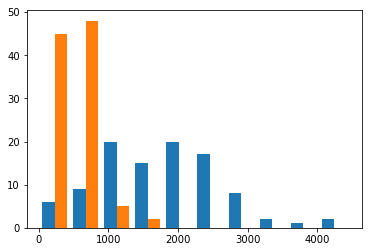

In [31]:
plt.hist(edges_number)
plt.show()

This graph confirms what has been said above, and it is possible to differenciate carcinoma from gland networks when the network has more than 2000 edges.

#### 4.3.4. Max degree

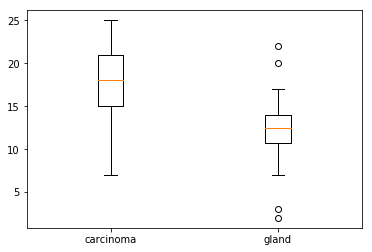

In [27]:
plt.boxplot(max_degree)
plt.xticks([1, 2], ['carcinoma', 'gland'])
plt.show()

The max degree of carcinoma networks is in average higher than the max degree of gland networks, but both boxes share a lot of area, then it is difficult to differenciate both kind graphs when their max degree is less that aprox. 15.

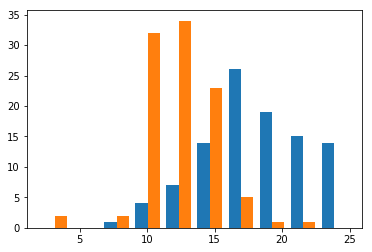

In [30]:
plt.hist(max_degree)
plt.show()

This graph confirms that it is difficult to discriminate both kind of networks when the max degree is less or equals than 15.

#### 4.3.5. Average degree

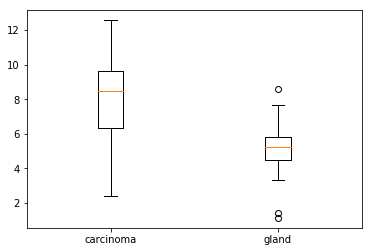

In [28]:
plt.boxplot(avg_degree)
plt.xticks([1, 2], ['carcinoma', 'gland'])
plt.show()

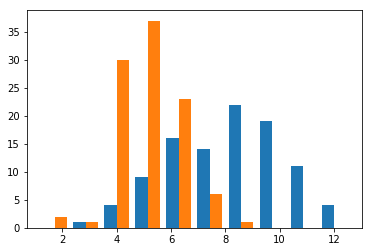

In [43]:
plt.hist(avg_degree)
plt.show()